Last week we cover the basics of Linear Regression. A nifty algorithm that we might have learn from our days of High School Algebra, but only now really understand how to fit to a dataset.
Following from this, this week we will be exploring a couple of algorithms that classification (and regressions in some instances).

We hope to cover in today's session,

- Logistic Regression

- Support Vector Machine (SVM)

- K-Nearest Neighbors

- Decision Tress

**Before getting started, any general questions on the reading this week?**


## Lets get familiarized with the Iris Dataset (one of the most famous toy datasets) 

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('fivethirtyeight')  

In [126]:
iris = datasets.load_iris() #the Iris dataset is so commonly used that it's available within the scikit-learn library

In [127]:
iris #we get a addressable dictionary of elements

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [128]:
iris_d = pd.DataFrame(data = np.array(iris['data']), columns = iris.feature_names)

In [129]:
iris_labels = pd.DataFrame(data = np.array(iris.target), columns = ['species'])
label_mapping = {0:"setosa", 1:"versicolor", 2: "virginica"}
iris_labels = iris_labels['species'].map(label_mapping)


In [130]:
dataset = iris_d.join(iris_labels)

In [131]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Setosa**

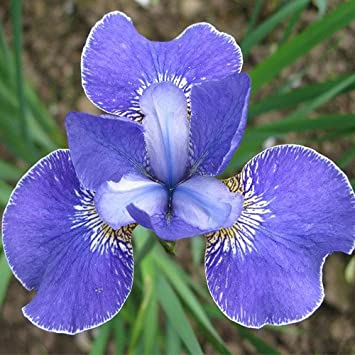

**Virginica**

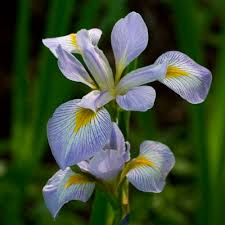

**Versicolor**

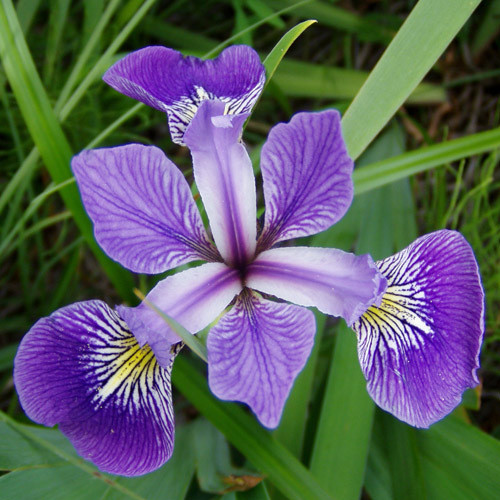

Clearly, if we are not "experts" in Iris plant recognition, it would be pretty hard to recognize and differentiate between them

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


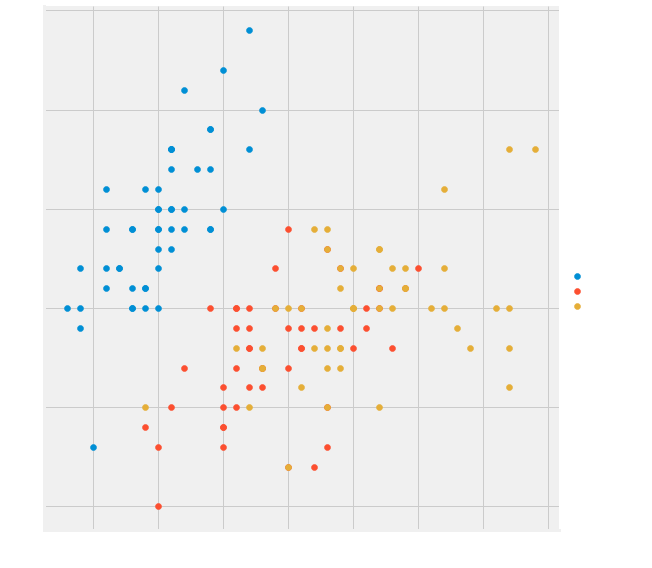

In [132]:
%matplotlib inline
sns.FacetGrid(dataset,hue='species',size=8)\
.map(plt.scatter,'sepal length (cm)','sepal width (cm)')\
.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


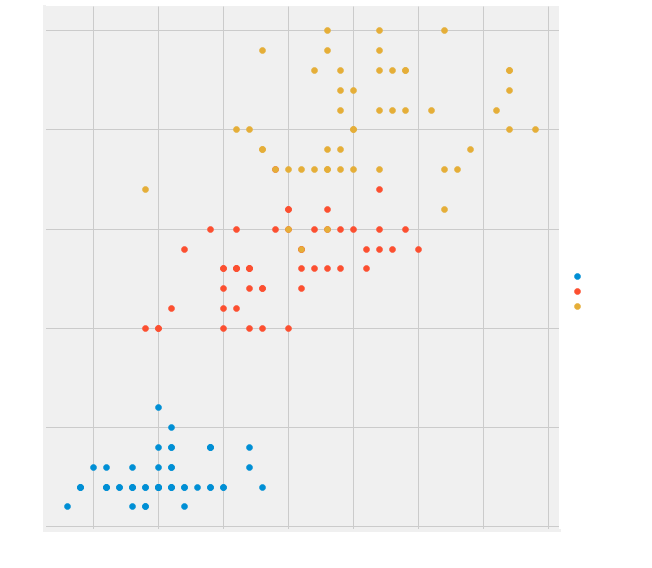

In [133]:
sns.FacetGrid(dataset,hue='species',size=8)\
.map(plt.scatter,'sepal length (cm)','petal width (cm)')\
.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

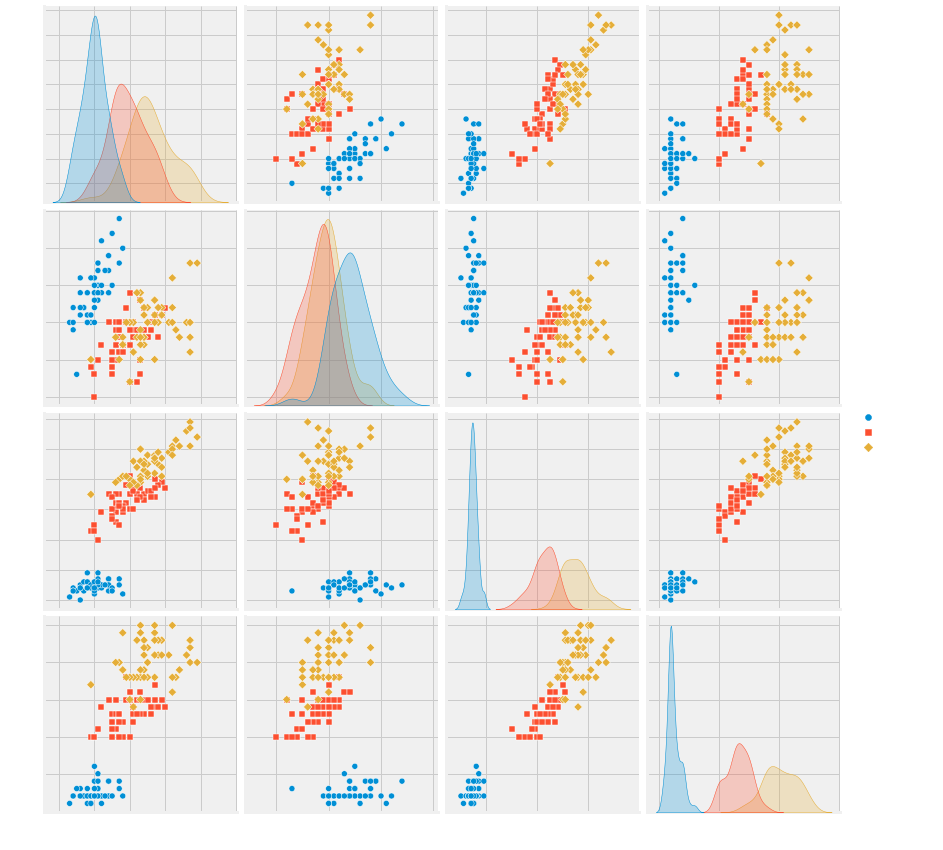

In [134]:
plt.figure()
sns.pairplot(dataset, hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5eceb772e8>,
      dtype=object)

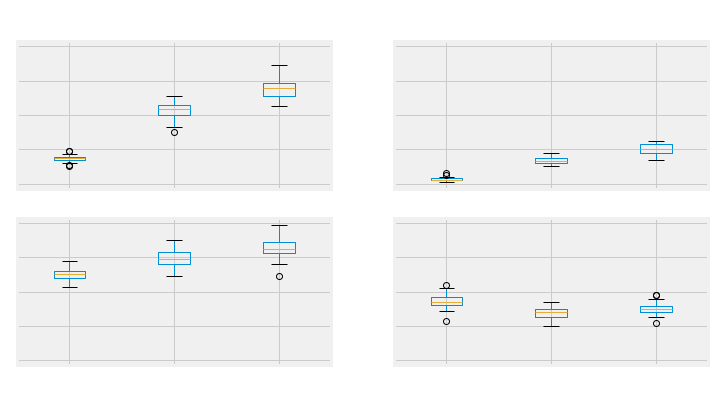

In [135]:
dataset.boxplot(by="species", figsize=(12, 6))

## **Logistic Regression**

The logistic regression limits the output to a number between 0 and 1. Don't be mislead, although it has regression in the name, this model is used mainly for classificiation.

$ f(wx + b) = \dfrac{{1}} {1 + e^{-(wx+b)}} $

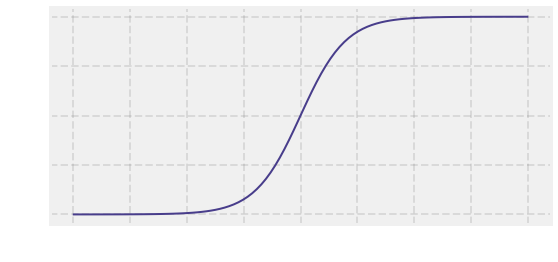

In [136]:

def sigmoid(x):
    """Returns value of the sigmoid function."""
    return 1/(1 + np.exp(-x))

# Calculate sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Create figure
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Plot sigmoid
ax.plot(x, y, linewidth=2, color='#483d8b')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Edit y-ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])

# Edit axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

**So, how does it work?**

The logistic regression tries to map the probability that a certain example is part of a class. 

If we only had two classes, it would be easy.

$P \geq 0.5 : Class 1$

$ P < 0.5 : Class 2$

To optimize, for this function we use our hypothesis function (the sigmoid) and apply it into a cost function (similar to the way we did with linear regression problem). Here, because we are doing classification we optimize for a function called the **log loss**.

### Log Loss

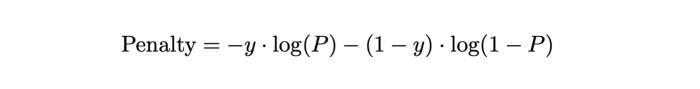

If we predict close to 0 and the actual label is 1, the first term will shoot up to a high negative value. 

In [137]:
import math
print("Log of small val:", math.log(0.001))
print("Log close to 1:", math.log(0.999))
print(-1*math.log(0.001) -(1-1)*math.log(1-0.001))

Log of small val: -6.907755278982137
Log close to 1: -0.0010005003335835344
6.907755278982137


If we predict 1 and the actual label is 0, we get the second term doing the same job.

In the case where our prediction closely matches the label.

In [138]:
print(-1*math.log(0.999) -(1-1)*math.log(1-0.999))

0.0010005003335835344


The penalty is extremely small

Using those principles, we can create a function that we have to minimize in order to ensure the performance of our predictions. Our **Cost Function**,


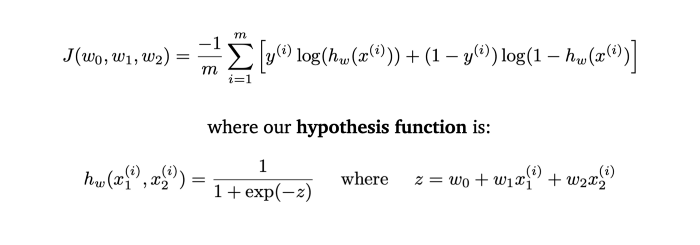

The Iris dataset deals with 3 classes. We have to find a way to extrapolate this algorithm into more than two classes. Luckily, we can use a methodology called **one vs. all classification**. Here, it's like we are training three different sigmoid classifiers.

These label the examples either as part of the specific class when $ P \geq 0.5$ or as the other class if $ P < 0.5$.

Now that we know this, lets train the model and see the results...

In [139]:
#Split the data into 80% training and 20% testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_d, iris_labels, test_size=0.2, random_state=45)


In [140]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
predictions = model.predict(x_test)
print(predictions)# printing predictions
print(y_test, "\n")# Printing new line

print("Accuracy:", accuracy_score(y_test, predictions))

['setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor']
0          setosa
43         setosa
129     virginica
3          setosa
34         setosa
44         setosa
38         setosa
105     virginica
123     virginica
140     virginica
28         setosa
125     virginica
113     virginica
103     virginica
133     virginica
35         setosa
145     virginica
142     virginica
40         setosa
87     versicolor
84     versicolor
85     versicolor
115     virginica
51     versicolor
4          setosa
112     virginica
92     versicolor
64     versicolor
10         setosa
91     versicolor
Name: species, dtype: object 

Accuracy: 0.9666666666666667


In [142]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

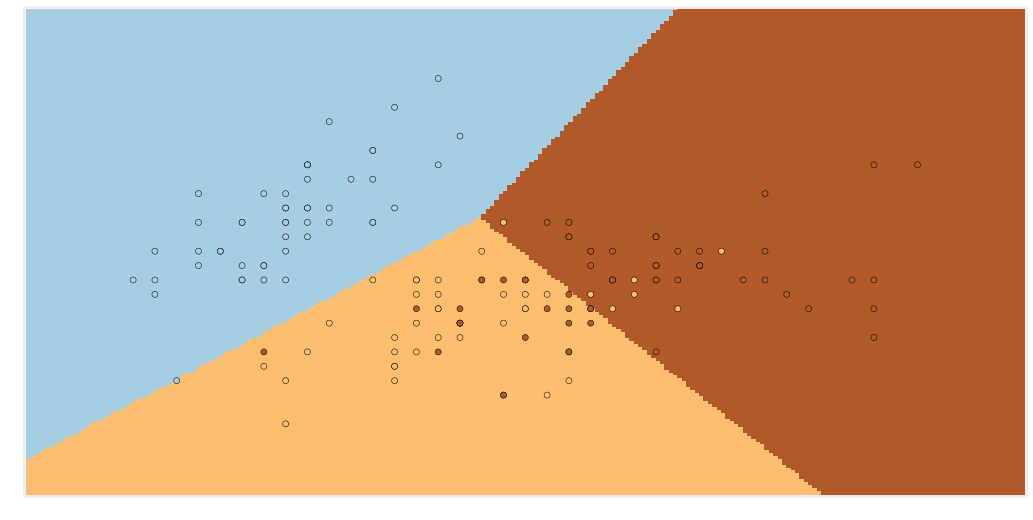

In [143]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(16, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
#t-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

The purpose of this quick analysis is just to demonstrate how it's not as easy to separate the example with the decision boundaries as the labels are mixed as seen above.

In [144]:
predictions_2features = logreg.predict(x_test)
#print(predictions_2features)# printing predictions
#print(y_test, "\n")# Printing new line

print("Accuracy:", accuracy_score(y_test, predictions_2features))

Accuracy: 0.7666666666666667


We don't quite get the same results as we got when we had more features, but here we've limited the feature # to be able to easily visualize the decision boundaries. 

As we approach higher dimensional space, it might be more easy to separate examples into their pertinent classes and make predictions

# SVM

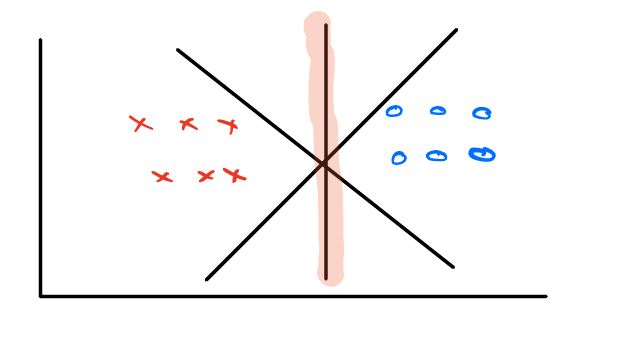

Again, in SVM the objective is to find a plane or planes that can separate our data into their respective classes. There's a twist though, instead of fitting a function to the data points so that we are drawing the decision boundary as close our data points as possible, we are now trying to find a boundary which is the furthest distance away from our examples.

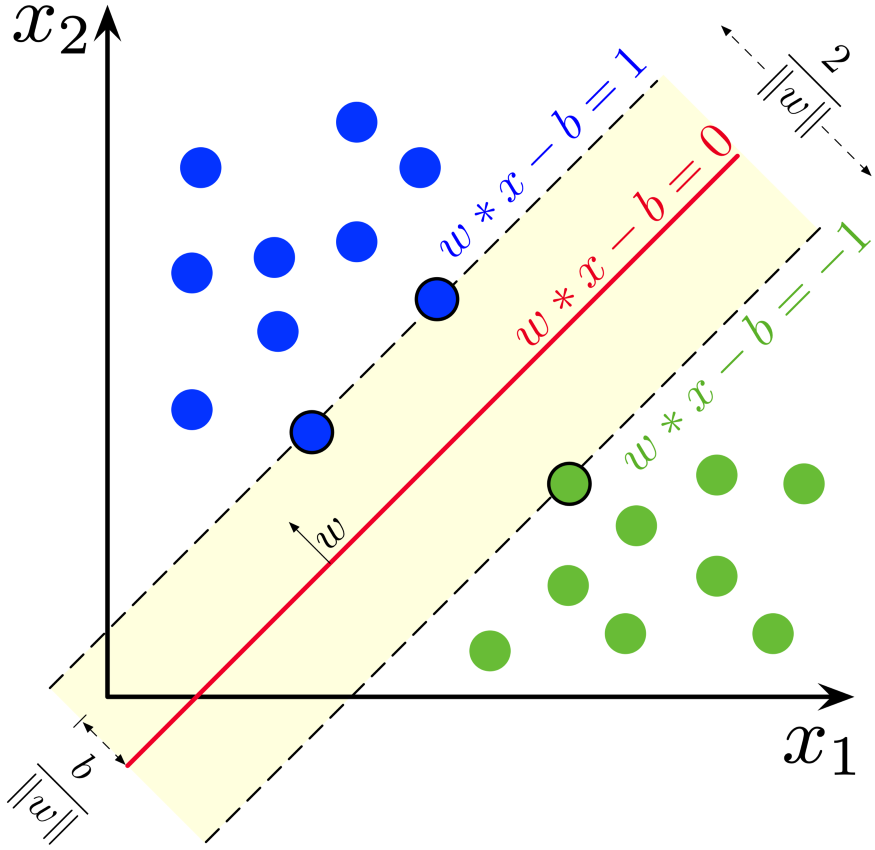

https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

We are now looking to have our hyperplane equidistant to the closest example from each class. Recall from the book that we want to find $ w$ $b $ such that,
- $ wx - b \geq +1: Class1$
-$wx - b \leq -1: Class 2$


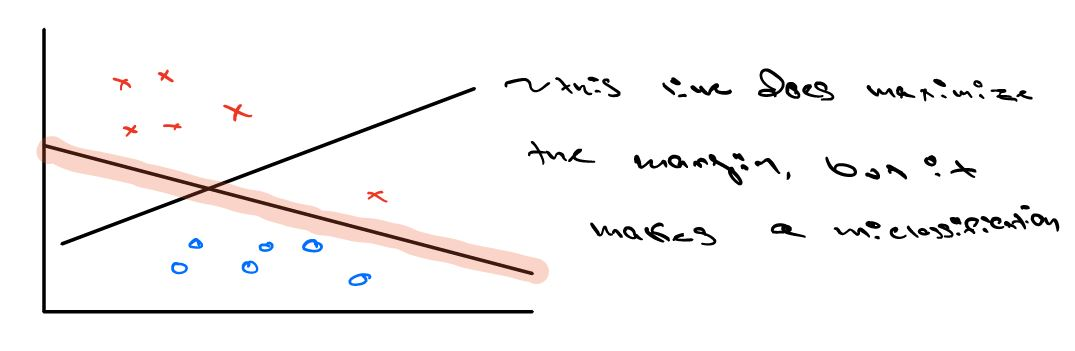

The line that maximizes the margin is always the one that most robust when it comes to minimizing the misclassification errors. This version of SVM is typically known as a **hard margin** SVM because the classification is prioritized before the minimization of the margin. In a **soft margin** SVM, we are allowed to make some misclassifications to ensure that we can maximize the margin a generalize from the data.

**How do we go about maximization the margin?**

We want to minimize the euclidean norm of $w$. 


$min$  $||w^2||$ = $ \dfrac{1}{2}\sqrt{\sum_{j=1}^{D}{(w^j)^2}}$ where j denotes the dimensionality of the $w$ feature weight vector

Additionally, as stated in the book, we can add the **hinge loss** to deal with the noise in our dataset.

$ \dfrac{1}{N}\sum_{j=1}^{N} max(0, 1-y_i(wx_i-b))$

- Where, N is the number of examples and $w$ $x$ are vectors.

Combining both the hinge loss and the margin maximization we obtain the equation seen in the book,
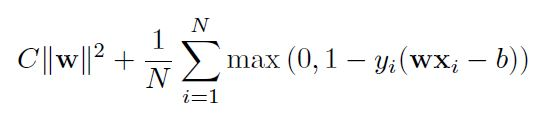

- The parameter C serves as a hyperparameter to tune how much weight we give to minimizing the margin vs. the hinge loss.

Minimizing this function to maximize the margin requires a knowledge of the Lagrandian Multiplier Method. Unfortunately, these is beyond what we expect to cover for begineers, but if you would like to dig a bit deeper into it, http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf.

Christopher Bishop's book also does a great job at explaining it in Chapter 7 (http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)

The jist of what we need to get here is that we are hoping to maximize the margin. How do we extrapolate that to a multi-class classificiation problem. Similar to the Logistic Regression problem, we apply the one vs the rest methodology where we have **K Classifiers for the K examples**.

An important question to ask is on what happens if the datasets that we are using are not linearly separable. How do we introduce nonlinearities into SVM. We can take our data into a higher dimensional space.


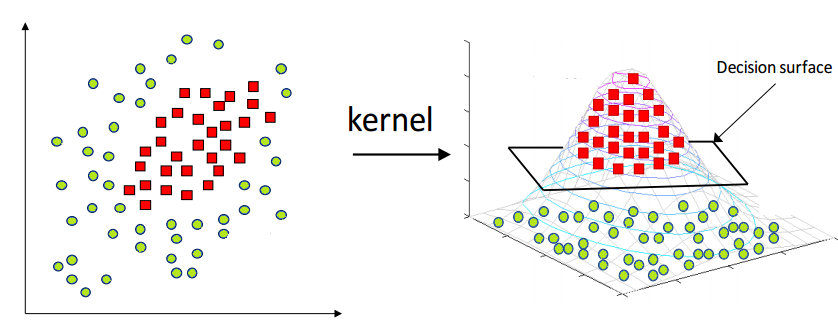

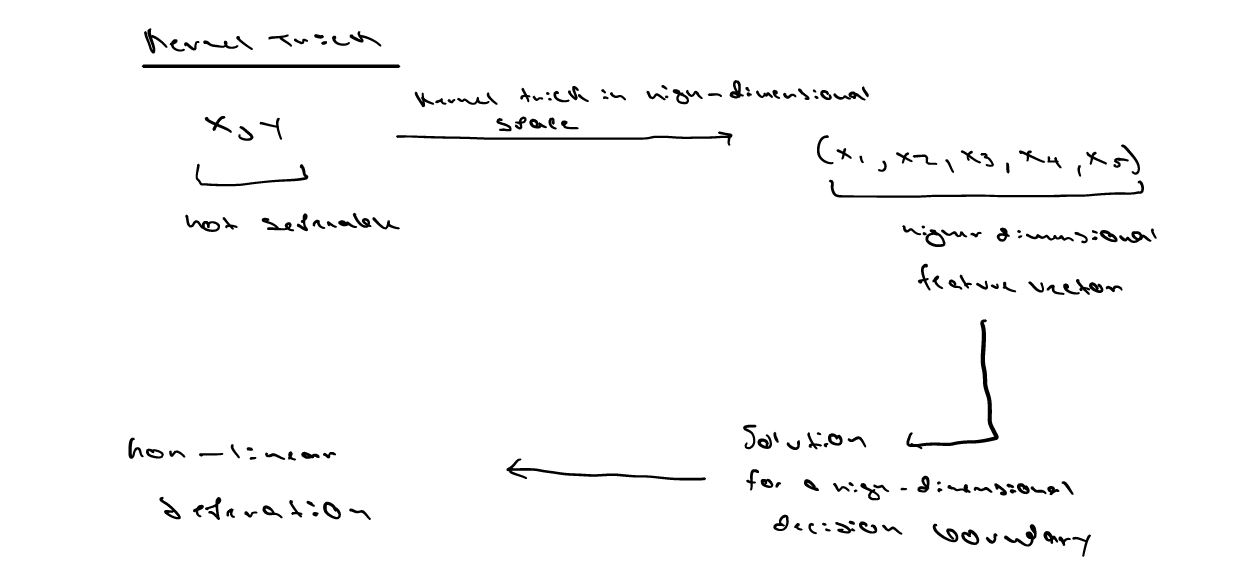

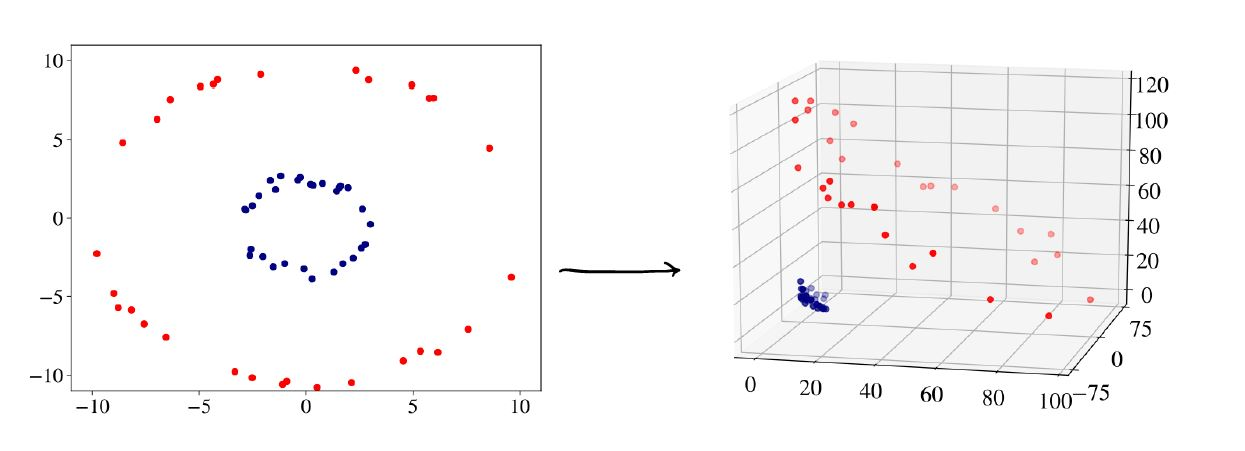

## Optional Kernel Tricks

In SVM, this can be implemented through **kernel tricks**. Once again, think about kernel tricks as a way to expand the dimensionality of our features without actually adding more features. The details of kernel tricks are complex, but if you want to give a read to these "pre-built" operations, I recommend this link (http://cs229.stanford.edu/summer2020/cs229-notes3.pdf)

For Visualizing them: http://www.cs.otago.ac.nz/staffpriv/mccane/publications/Szymanski2011Visualising.pdf

### 2nd Degree Polynomial Kernel
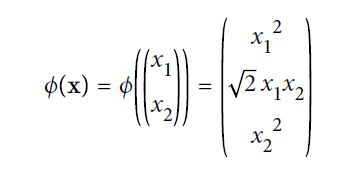

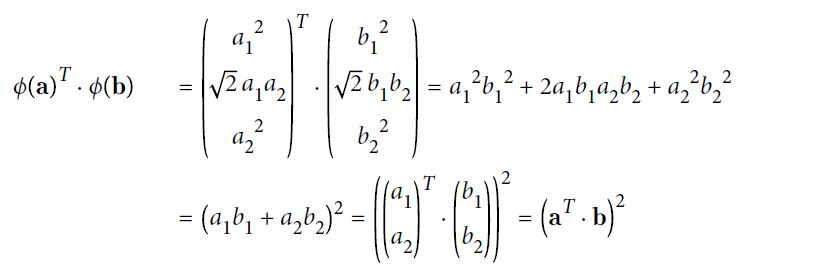

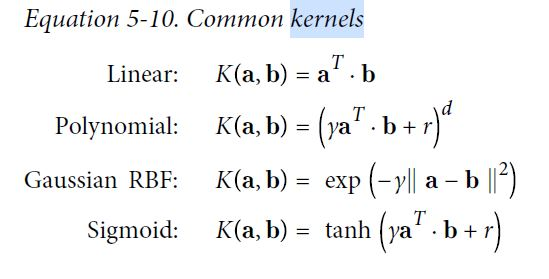

## SVM Continued

In [145]:
from sklearn import svm

iris = datasets.load_iris()
#Store variables as target y and the first two features as X (sepal length and sepal width of the iris flowers)
X = iris.data[:, :2]
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, Y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(X_train, Y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(X_train, Y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(X_train, Y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

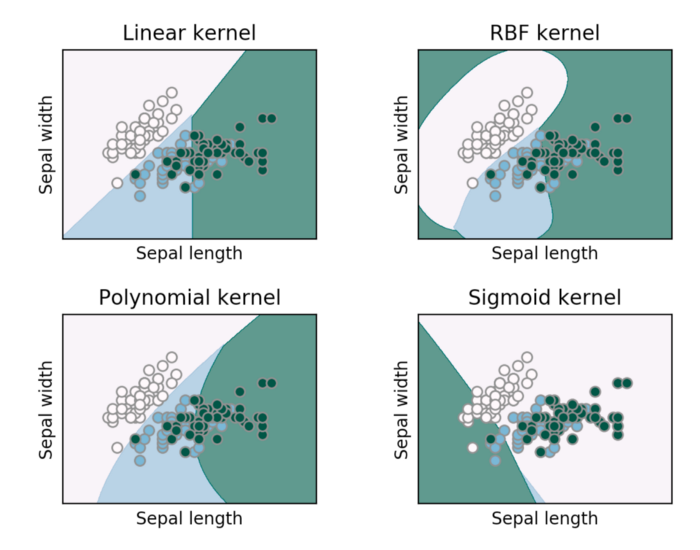

In [146]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [147]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, Y_test)
accuracy_poly = poly.score(X_test, Y_test)
accuracy_rbf = rbf.score(X_test, Y_test)
accuracy_sig = sig.score(X_test, Y_test)
print(accuracy_lin)
print(accuracy_poly)
print(accuracy_rbf)
print(accuracy_sig)

0.7333333333333333
0.7333333333333333
0.6666666666666666
0.2


# K-Nearest Neighbors

KNN is a non parametric model. **What does that really mean?** In the previous models we've seen how we train weight and bias parameters to fit our model to our dataset. In the case of KNN, we are not actually training any parameters. Instead, we are retaining all of the features and labels in memory and using those to make an inference on test/future examples. This means that as we climb to a KNN model with hundreds of thousands of examples, our inference speeds dramatically increase.

KNN works by comparing new datapoints to the previously seen examples and then labelling the new datapoint to the group of datapoints that it most closely resembles.

The algorithm is called KNN as we choose a hyperparameter (K) that defines the number of closest examples the algorithm takes into account before making its decision.

- If k = 2, the new datapoint will be labelled as the category of the 2 closest datapoints to it.

As mentioned by the book, two ways to quantify the similarity are the **Euclidean Distance** and the **Cosine Similarity**. We've previously seen the Euclidean Distance as the shortest path between two points in the loss function for linear regression.

$Euclidean D =\ \sqrt{\sum_{i\ =\ 1}^{n}{({\rm x_{data}}_i\ -\ {\rm x_{new}}_i)}^2}$
- Where, $i$ loops through all the features in the dataset (sepal length, width...etc)

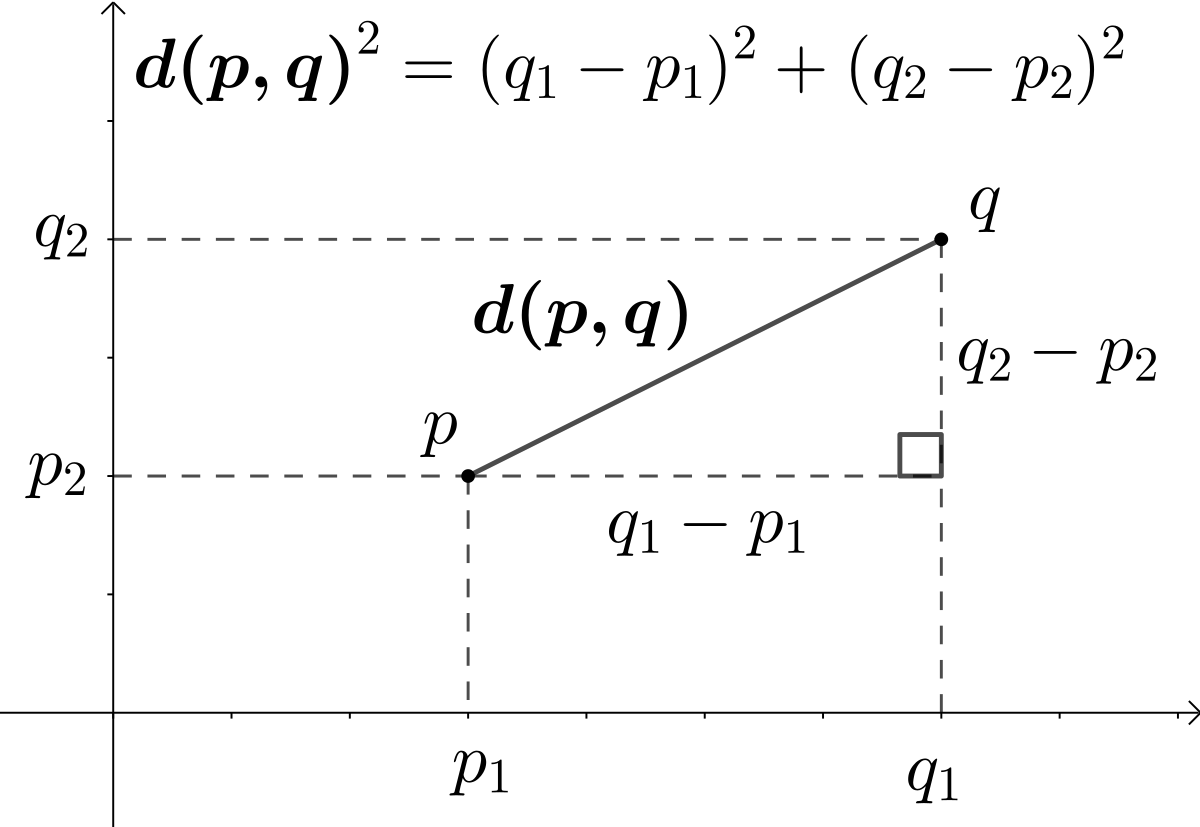

The cosine similarity is derived from the euclidean dot product (dot product of vectors). The dot product between two vectors is defined as,

$ a\cdot b = \sum_{i\ =\ 1}^{n}{a_ib_i} = ||a||$ $||b||$ $cos(\theta)$

- There's generally two ways to define the dot product of two vectors. The first one (represented by the summation here) tells us that the dot product of two vectors is the sum of the product of its components (this returns a scalar). The second definition (expressed by the bit with the cosine) is more a geometric representation. It tells us that the dot product of two vectors can be define as the the product between the length of vector $a$ and the length of $b$ in the directions of $a$.

With some rearragement, we get the **cosine similarity**, 

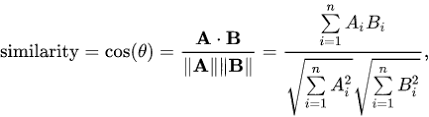

- This metric has a range between -1 and 1 (as given by the posible values of $cos(\theta)$

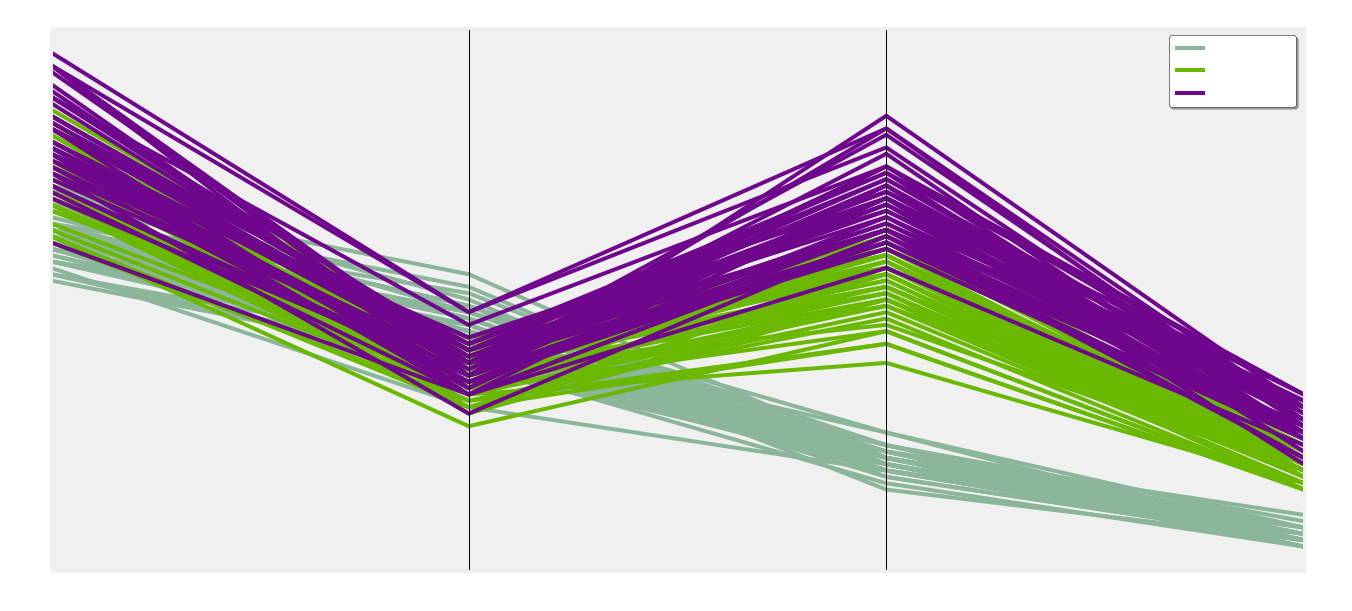

In [148]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,10))
parallel_coordinates(dataset, "species")
plt.title('Feature Value Variability', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## kNN on 2 Features

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# play around with the ks
classifier = KNeighborsClassifier(n_neighbors=32)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [150]:
accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 63.33 %.


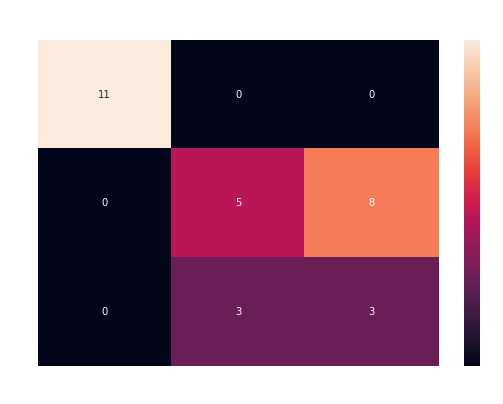

In [151]:
cm= confusion_matrix(Y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('kNN two features \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## kNN on 4 Features

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## reinstantiating the 4 feature train/test split
fourx_train, fourx_test, foury_train, foury_test = train_test_split(iris_d, iris_labels, test_size=0.2, random_state=45)

# play around with the number of ks
knn_model = KNeighborsClassifier(n_neighbors=30)

# Fitting the model
knn_model.fit(fourx_train, foury_train)

# Predicting the Test set results
foury_pred = knn_model.predict(fourx_test)

four_accuracy = accuracy_score(foury_test, foury_pred)*100
print('Accuracy of our model is equal ' + str(round(four_accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.33 %.


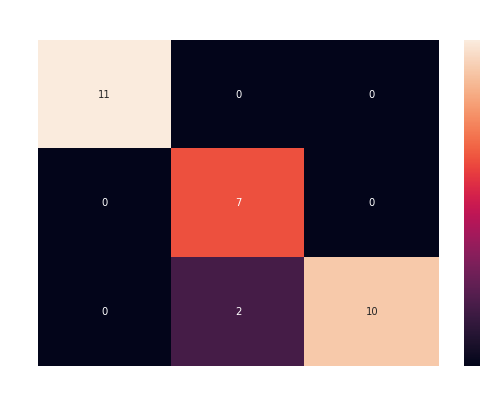

In [153]:
cm_four = confusion_matrix(foury_test, foury_pred)
cm_df = pd.DataFrame(cm_four,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('kNN four features \nAccuracy:{0:.3f}'.format(accuracy_score(foury_test, foury_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## (Optional) Hyperparameter Optimization

<Figure size 432x288 with 0 Axes>

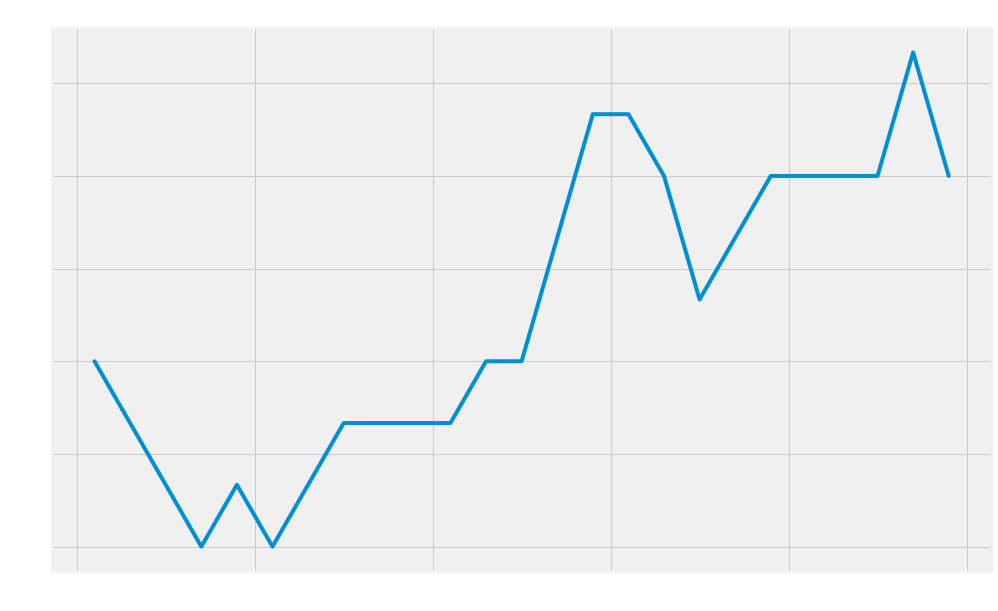

In [154]:
#https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris_d, iris_labels, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

Just to re-iterate, it's important to note that knn would struggle to calculate the lengths and do inference if we had more than 150 examples and higher dimensionality. kNN is typically implemented with the MNIST dataset for digit classification so feel fre to experiment with that.

# Decision Trees

Decision Trees are the most easy to visualize and understand out of the algorithms that we have explored. We arrive at a criterion at each node and split depending on the value/state of the feature being evaluated.

Take for example the Titanic challenge,

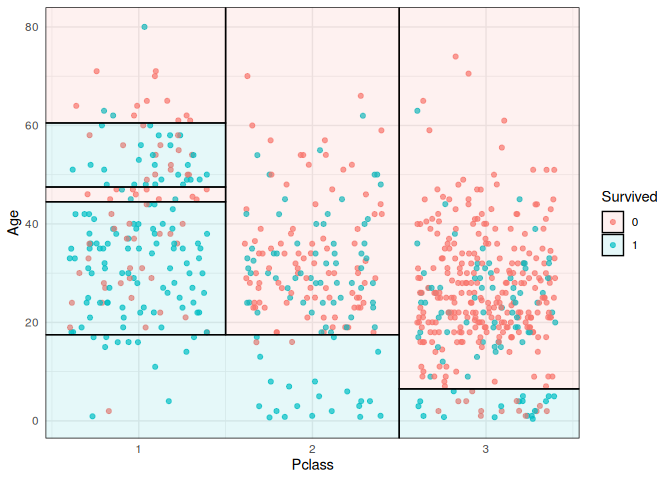

What I want to highlight from here is the intricacies of the decision boundaries. Obviously, our model hasn't only been trained with age and pclass. Below we can see a more holistic picture of the dataset.

## Dataset Composition

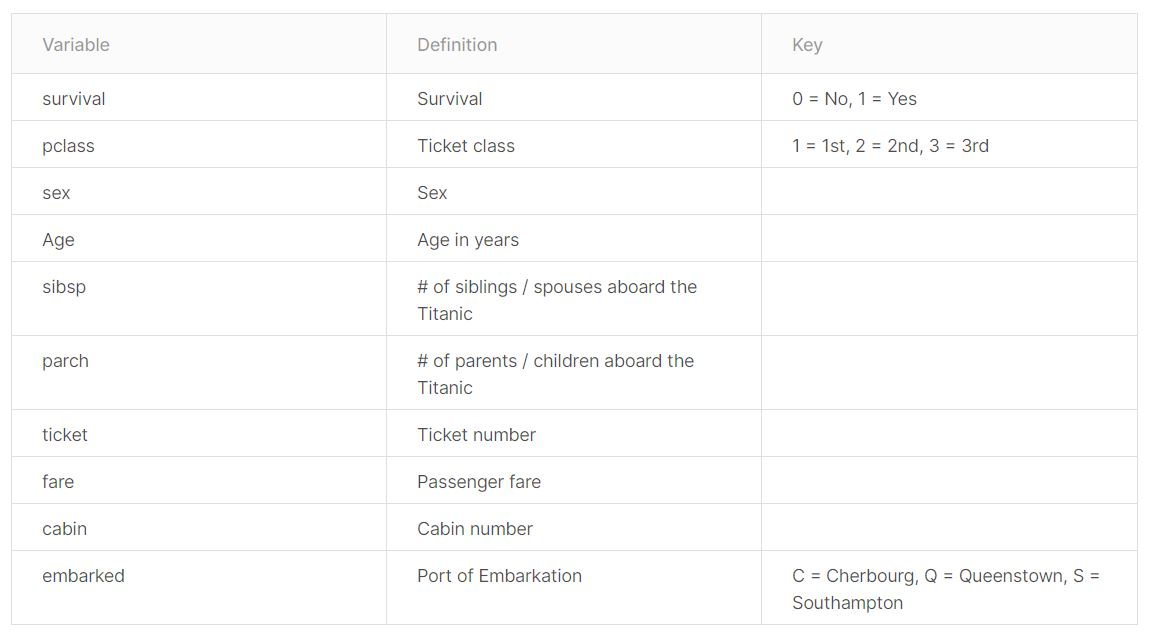

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [156]:
mod_tree = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
mod_tree.fit(fourx_train, foury_train)
mod_tree.predict(fourx_test)

array(['setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor'], dtype=object)

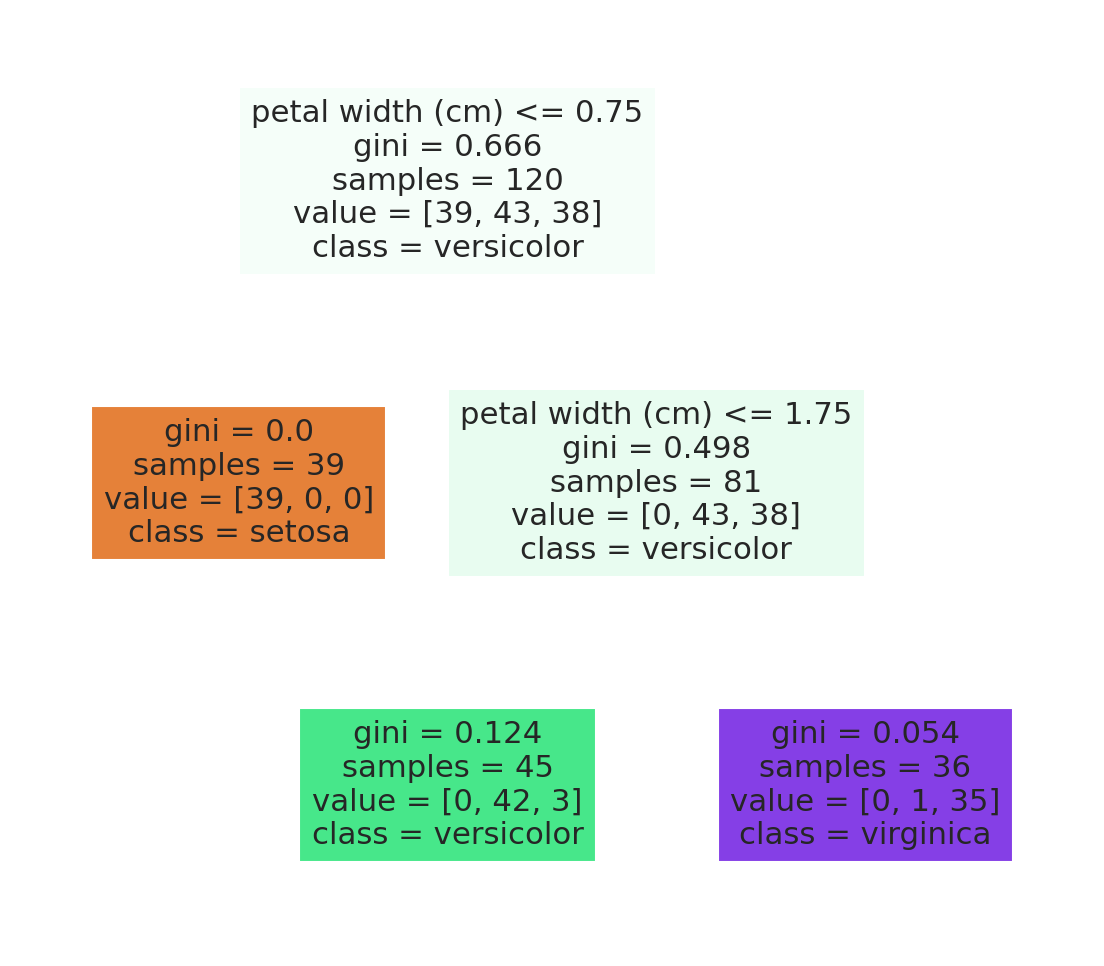

In [157]:
#tree.plot_tree(mod_tree)
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
#plt.style.use('dark_background')
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(mod_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')